# <sup>13</sup>C Fractionation of Carbon Species and Solids

## On isotope notation

In all the following:
$$
\begin{align}
R &= \frac{M_1}{M_0} \\
\alpha &= \frac{R_{sample}}{R_{reference}} \\
\Delta &= (\alpha - 1) \times 1000
\end{align}
$$
To avoid issues with non-linear mixing behaviour of ratios, isotope mixing calculations are conducted with fractional abundances:
$$
A = \frac{M_1}{M_0 + M_1} = \frac{R}{1 + R}
$$
Where:
$$
R = \frac{A}{1 - A}
$$

## Fractionation of Carbon Species from Zhang et al. (1995)



$$
\begin{align}
\Delta_{CG} &= \Delta_{CO3-CO2(G)} = -(0.052 \pm 0.021) T_C + (7.22 \pm 0.38) ‰ \\
\Delta_{BG} &= \Delta_{HCO3-CO2(G)} = -(0.1141 \pm 0.0028) T_C + (10.78 \pm 0.04) ‰
\end{align}
$$

In [1]:
import numpy as np
import uncertainties.unumpy as unp
import uncertainties as un
import matplotlib.pyplot as plt

nom = unp.nominal_values
err = unp.std_devs

%matplotlib inline

In [2]:
def Delta_CG(T):
    m = un.ufloat(-0.052, 0.021)
    c = un.ufloat(7.22, 0.38)
    return m * T + c

def alpha_CG(T):
    return 1 + Delta_CG(T) / 1000

def Delta_BG(T):
    m = un.ufloat(-0.1141, 0.0028)
    c = un.ufloat(10.78, 0.04)
    return m * T + c

def alpha_BG(T):
    return 1 + Delta_BG(T) / 1000

def alpha_BC(T):
    return alpha_BG(T) / alpha_CG(T)

PDB_13C = 0.01118

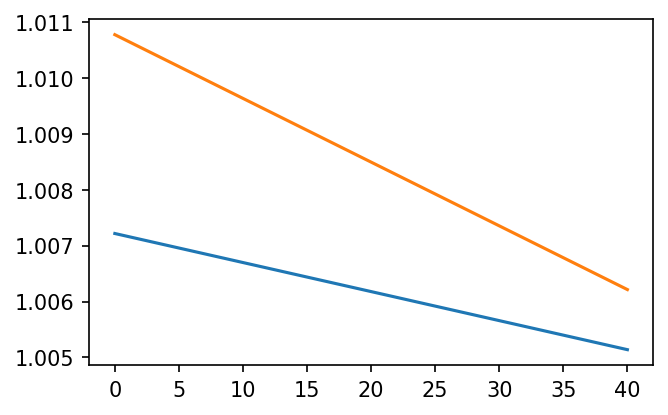

In [3]:
t = np.linspace(0, 40)

eCG = Delta_CG(t)
aCG = alpha_CG(t)
plt.plot(t, nom(aCG))

eBG = Delta_BG(t)
aBG = alpha_BG(t)
plt.plot(t, nom(aBG))

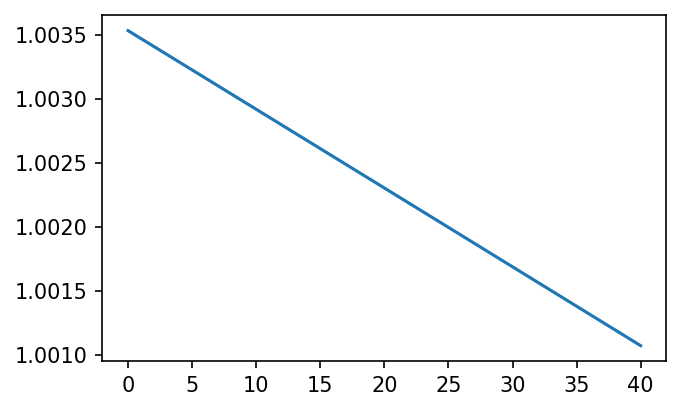

In [4]:
aBC = alpha_BC(t)
plt.plot(t, nom(aBC))

## Fractionation of Calcite from Romanek et al. (1992)

$$
\Delta_{SB} = \Delta_{Solid-HCO3} = 1 \pm 0.2 ‰
$$

In [5]:
Delta_SB = un.ufloat(1, 0.2)
alpha_SB = 1 + Delta_SB / 1000

### <sup>13</sup>C of BaCO3 solutions

In [6]:
T = 25

In [7]:
# measured 13C_PDB values of 13C CO3 stock solutions
d_A18QP_raw = np.array([386.26, 390.93, 390.33, 390.13, 387.51])  # April18QP BaCO3 solution
d_J18QP_raw = np.array([394.94, 395.55, 395.31, 397.20, 395.22])  # June18QP BaCO3 solution

# calculate alpha values
a_A18QP_raw = 1 + d_A18QP_raw / 1000
a_J18QP_raw = 1 + d_J18QP_raw / 1000

# calculate means
a_A18QP = un.ufloat(a_A18QP_raw.mean(), a_A18QP_raw.std())
a_J18QP = un.ufloat(a_J18QP_raw.mean(), a_J18QP_raw.std())

In [8]:
# calculate bicarbonate alphas
a_A18QP_HCO3 = a_A18QP * alpha_BC(T)
a_J18QP_HCO3 = a_J18QP * alpha_BC(T)

In [9]:
# calculate calcite alphas
c_A18QP_HCO3 = a_A18QP_HCO3 * alpha_SB
c_J18QP_HCO3 = a_J18QP_HCO3 * alpha_SB